In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib


/home/jackson/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('/home/jackson/research/data/tortuosity_study/read_csvs/dan_dryrun2.csv')

In [3]:
df.head()

,id_user,id_img,val,timespan,name_mapping,tortuosity_dryRun2,tortuosity_option2,tortuosity_option2_no_loops
0,2,1,2,67,1687394,1.6634,1.3037,1.2506
1,2,12,3,11,1687395,1.1856,1.0308,1.0310
2,2,23,3,34,1687396,1.2558,1.0845,1.0855
3,2,34,3,30,1687397,1.2665,1.0580,1.0597
4,2,44,1,17,1687398,1.2261,1.0511,1.0516


In [4]:
col_name = "tortuosity_option2_no_loops"
df[["val", col_name, "name_mapping"]]

,val,tortuosity_option2_no_loops,name_mapping
0,2,1.2506,1687394
1,3,1.0310,1687395
2,3,1.0855,1687396
3,3,1.0597,1687397
4,1,1.0516,1687398
5,1,1.0133,1687399
6,1,1.0728,1687400
7,1,1.0423,1687401
8,3,1.0311,1687402
9,1,1.0311,1687403


In [5]:
arr = df['val'].to_numpy()

arr2 = [x%2 for x in arr]
Y = np.logical_not(arr2)
X = df[col_name].to_numpy()
thresh = 1.295

Text(0.5, 1.0, 'Grade distribution of read 3 dry run')

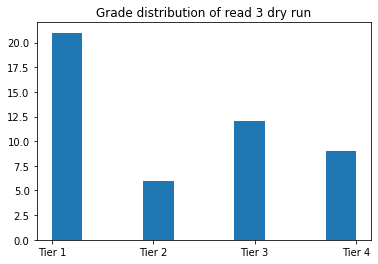

In [6]:
plt.hist(df['val'])
plt.xticks([1, 2, 3, 4], ['Tier 1', 'Tier 2', 'Tier 3', 'Tier 4'])
plt.title("Grade distribution of read 3 dry run")

In [7]:
dt = DecisionTreeClassifier(max_depth=1)
dt.fit(X.reshape(-1,1),Y.reshape(-1,1))

thresh = dt.tree_.threshold[0]

[Text(0.5, 0.75, 'tortuosity <= 1.076\ngini = 0.43\nsamples = 48\nvalue = [33, 15]'),
 Text(0.25, 0.25, 'gini = 0.061\nsamples = 32\nvalue = [31, 1]'),
 Text(0.75, 0.25, 'gini = 0.219\nsamples = 16\nvalue = [2, 14]')]

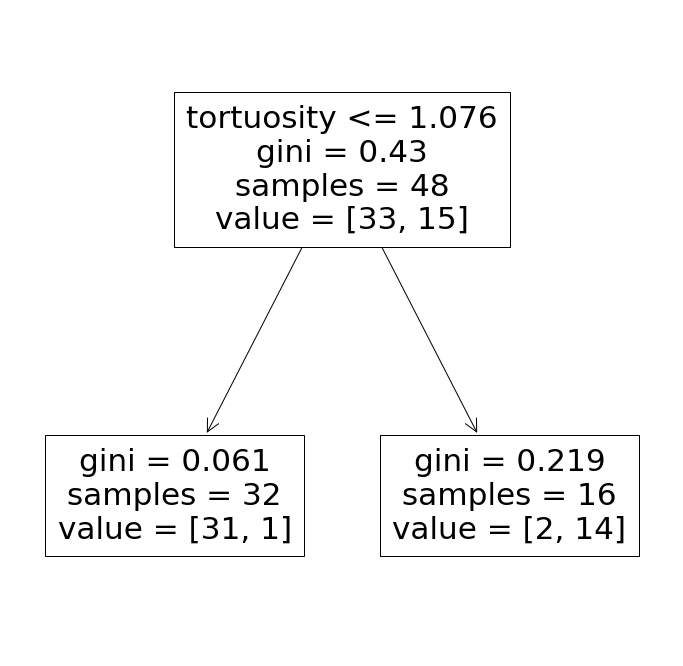

In [8]:
# show tree
from sklearn.tree import plot_tree
plt.figure(figsize=(12,12))
plot_tree(dt, feature_names=['tortuosity'])


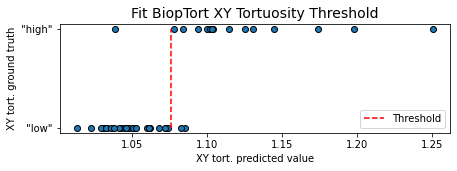

In [9]:
import matplotlib.tight_bbox


plt.figure(figsize=(7, 2))


plt.plot(X,Y, 'o', markeredgecolor='black')
# plt.rc('axes', titlesize=8)     # Axes title size
plt.rc('axes', labelsize=12)     # Axes labels size
plt.rc('xtick', labelsize=10)    # X-tick labels size
plt.rc('ytick', labelsize=10)    # Y-tick labels size
plt.rc('legend', fontsize=10)    # Legend font size
plt.rc('figure', titlesize=16)   # Figure title size
# plot a line at x = 1.25
bbox = matplotlib.transforms.Bbox([[0, -0.5], [7, 2.5]])
plt.plot([thresh, thresh], [0, 1], 'r--', label='Threshold')
plt.title('Fit BiopTort XY Tortuosity Threshold')
plt.yticks([0,1], ['"low"', '"high"'])
plt.xlabel('XY tort. predicted value')
plt.ylabel('XY tort. ground truth')
plt.legend()
plt.savefig('tortuosity_vs_grade.png', dpi=600, pad_inches=4, bbox_inches=bbox)


In [10]:
conf_x = X > thresh
conf_y = Y
cf = confusion_matrix(conf_y, conf_x)

In [11]:
print(f'Accuracy: {accuracy_score(conf_y, conf_x)}')
print(f'Precision: {precision_score(conf_y, conf_x)}')
print(f'Recall: {recall_score(conf_y, conf_x)}')
print(f'F1: {f1_score(conf_y, conf_x)}')

Accuracy: 0.9375
Precision: 0.875
Recall: 0.9333333333333333
F1: 0.9032258064516129


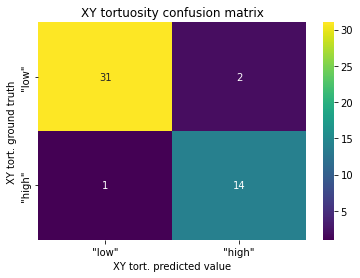

In [45]:
import seaborn as sns
# cm = [[31,2], [4,11]]
# Create a heatmap of the confusion matrix using Seaborn in viridis colors
sns.heatmap(cf, annot=True, cmap='viridis', fmt='g')

# Add labels and title to the plot
plt.xticks([0.5, 1.5], ['"low"', '"high"'])
plt.yticks([0.5, 1.5], ['"low"', '"high"'])

plt.xlabel('XY tort. predicted value')
plt.ylabel('XY tort. ground truth')
plt.title('XY tortuosity confusion matrix')
plt.savefig('confusion_matrix.png', dpi=600)